In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('..')

In [6]:
scenes = [
    "High Traffic Scenerio",
    "Low Traffic Scenerio",
    "NS-Traffic Scenerio",
    "EW-Traffic Scenerio",
]

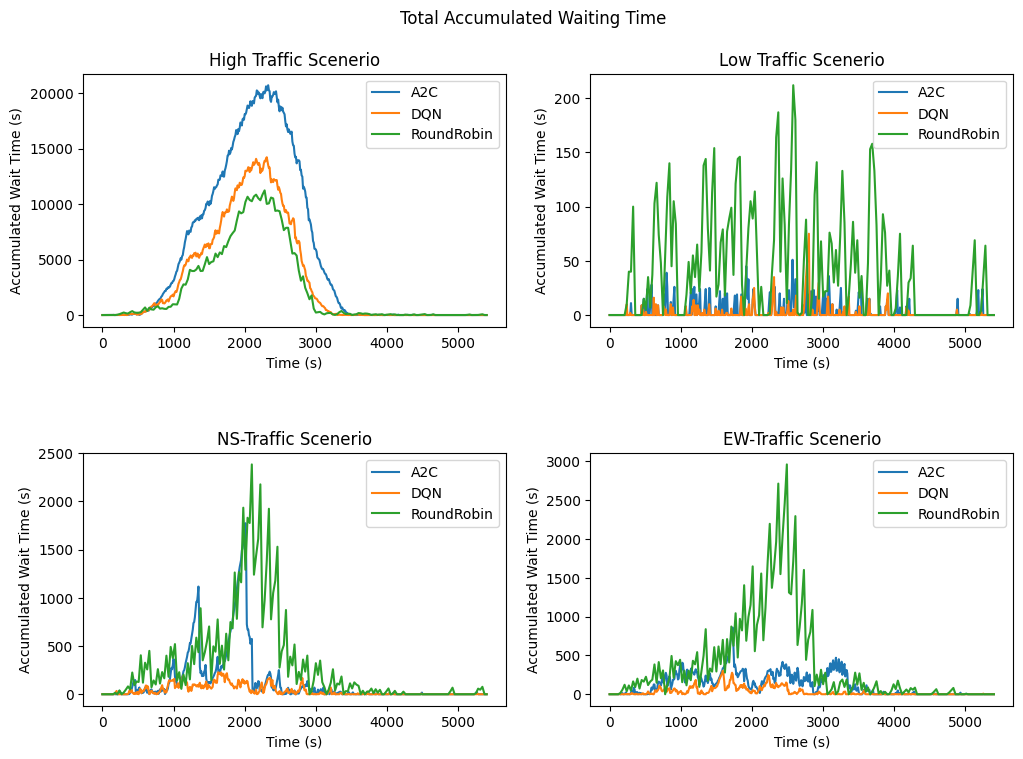

In [7]:
output_dir = 'outputs/test'
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(top=0.9, hspace=0.5)

for i, ax in enumerate(axes.flat):
    for file in sorted(os.listdir(output_dir + '/{}'.format(i))):
        if file.endswith('.csv'):
            df = pd.read_csv(output_dir + '/{}/{}'.format(i, file))
            ax.plot(df['step'], df['agents_total_accumulated_waiting_time'], label=file.split('_')[0])
    ax.set_title(scenes[i])
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Accumulated Wait Time (s)")
    ax.legend()

fig.suptitle("Total Accumulated Waiting Time")
plt.show()


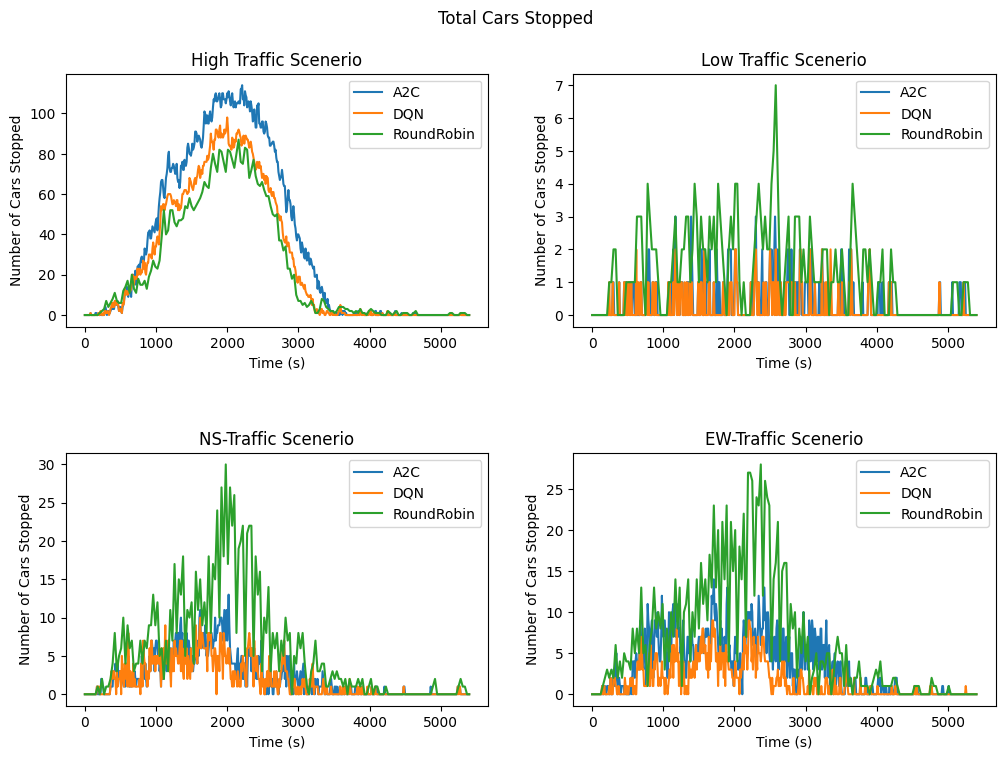

In [8]:
output_dir = 'outputs/test'
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(top=0.9, hspace=0.5)

for i, ax in enumerate(axes.flat):
    for file in sorted(os.listdir(output_dir + '/{}'.format(i))):
        if file.endswith('.csv'):
            df = pd.read_csv(output_dir + '/{}/{}'.format(i, file))
            ax.plot(df['step'], df['agents_total_stopped'], label=file.split('_')[0])
    ax.set_title(scenes[i])
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Number of Cars Stopped")
    ax.legend()

fig.suptitle("Total Cars Stopped")
plt.show()

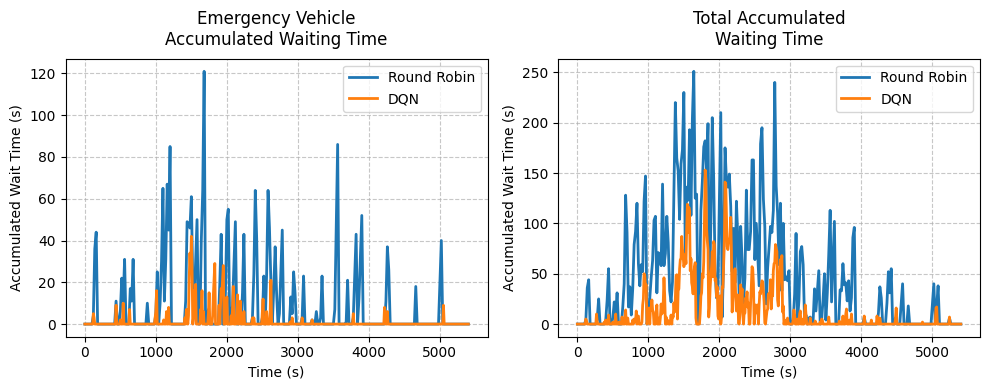

In [19]:
rr = pd.read_csv('outputs/test/Emergency/RoundRobin_conn0_ep1.csv')
dqn = pd.read_csv('outputs/test/Emergency/DQN_conn1_ep1.csv')

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Emergency Vehicle Waiting Time
ax1.plot(rr['step'], rr['emergency_waiting_time'], label='Round Robin', linewidth=2)
ax1.plot(dqn['step'], dqn['emergency_waiting_time'], label='DQN', linewidth=2)
ax1.set_title('Emergency Vehicle\nAccumulated Waiting Time', fontsize=12, pad=10)
ax1.set_xlabel("Time (s)", fontsize=10)
ax1.set_ylabel("Accumulated Wait Time (s)", fontsize=10)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Total Accumulated Waiting Time
ax2.plot(rr['step'], rr['agents_total_accumulated_waiting_time'], label='Round Robin', linewidth=2)
ax2.plot(dqn['step'], dqn['agents_total_accumulated_waiting_time'], label='DQN', linewidth=2)
ax2.set_title('Total Accumulated\nWaiting Time',  fontsize=12, pad=10)
ax2.set_xlabel("Time (s)", fontsize=10)
ax2.set_ylabel("Accumulated Wait Time (s)", fontsize=10)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()